1．分类决策树模型是表示基于特征对实例进行分类的树形结构。决策树可以转换成一个**if-then**规则的集合，也可以看作是定义在特征空间划分上的类的条件概率分布。

2．决策树学习旨在构建一个与训练数据拟合很好，并且复杂度小的决策树。因为从可能的决策树中直接选取最优决策树是NP完全问题。现实中采用启发式方法学习次优的决策树。

决策树学习算法包括3部分：特征选择、树的生成和树的剪枝。常用的算法有ID3、
C4.5和CART。

3．特征选择的目的在于选取对训练数据能够分类的特征。特征选择的关键是其准则。常用的准则如下：

（1）样本集合$D$对特征$A$的信息增益（ID3）


$$g(D, A)=H(D)-H(D|A)$$

$$H(D)=-\sum_{k=1}^{K} \frac{\left|C_{k}\right|}{|D|} \log _{2} \frac{\left|C_{k}\right|}{|D|}$$

$$H(D | A)=\sum_{i=1}^{n} \frac{\left|D_{i}\right|}{|D|} H\left(D_{i}\right)$$

其中，$H(D)$是数据集$D$的熵，$H(D_i)$是数据集$D_i$的熵，$H(D|A)$是数据集$D$对特征$A$的条件熵。	$D_i$是$D$中特征$A$取第$i$个值的样本子集，$C_k$是$D$中属于第$k$类的样本子集。$n$是特征$A$取 值的个数，$K$是类的个数。

（2）样本集合$D$对特征$A$的信息增益比（C4.5）


$$g_{R}(D, A)=\frac{g(D, A)}{H(D)}$$


其中，$g(D,A)$是信息增益，$H(D)$是数据集$D$的熵。

（3）样本集合$D$的基尼指数（CART）

$$\operatorname{Gini}(D)=1-\sum_{k=1}^{K}\left(\frac{\left|C_{k}\right|}{|D|}\right)^{2}$$

特征$A$条件下集合$D$的基尼指数：

 $$\operatorname{Gini}(D, A)=\frac{\left|D_{1}\right|}{|D|} \operatorname{Gini}\left(D_{1}\right)+\frac{\left|D_{2}\right|}{|D|} \operatorname{Gini}\left(D_{2}\right)$$
 
4．决策树的生成。通常使用信息增益最大、信息增益比最大或基尼指数最小作为特征选择的准则。决策树的生成往往通过计算信息增益或其他指标，从根结点开始，递归地产生决策树。这相当于用信息增益或其他准则不断地选取局部最优的特征，或将训练集分割为能够基本正确分类的子集。

5．决策树的剪枝。由于生成的决策树存在过拟合问题，需要对它进行剪枝，以简化学到的决策树。决策树的剪枝，往往从已生成的树上剪掉一些叶结点或叶结点以上的子树，并将其父结点或根结点作为新的叶结点，从而简化生成的决策树。


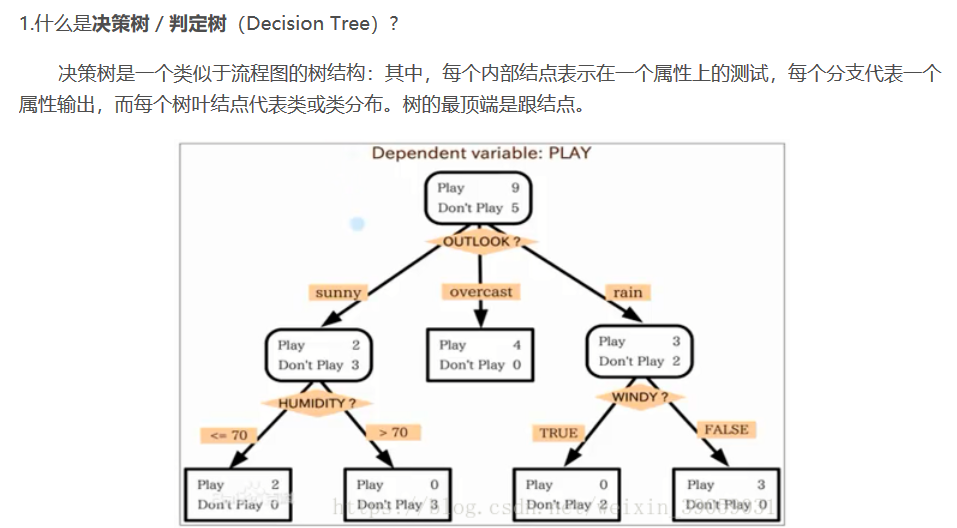

举个例子：我们用决策树来计算一下小明是否会去游泳，如上图所示，我们首先需要去窗外看一下今天什么天气吖？我们假设有三种结果：晴天、阴天、雨天，我们就可以得到上图从根结点出来的三种输出，假设是晴天，之后我们又要看湿度是多少：小于等于70，大于70两种。如果构建出来了这样的决策树的话我们就可以判断了。在方框中显示的是小明以往游泳的实例。

再举个实例说明：


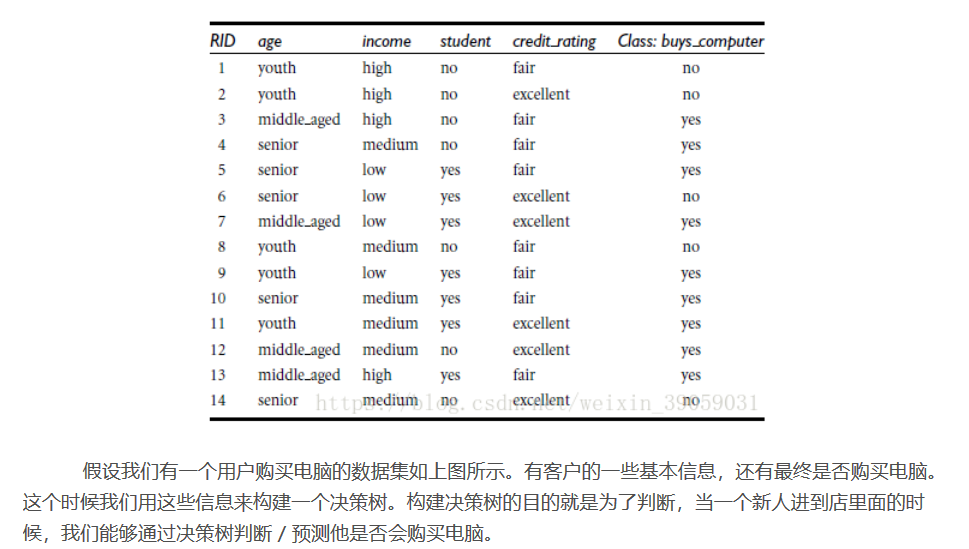

那么我们如何来创建一个这样的决策树呢？

在创建决策树之前，我们需要先来了解一个概念，熵（entropy），也叫做信息熵。

我们知道信息是一个非常抽象的概念，所以我们如何来度量信息呢？由此呢，在1948年，香农提出了‘信息熵（entropy）’的概念。什么意思呢？就是一条信息的信息量大小和它的不确定性有直接关系，如果我们要搞清楚一件非常不确定的事情，或则是我们一无所知的事情，需要了解大量信息==>信息量的度量就等于不确定性的多少啦。举个例子来说，假如说我们猜世界杯冠军，加入我们一无所知，我们需要猜多少次？我们都知道世界杯有32支球队，给每只球队都编号，每次提问只能得到是或否的答案。比如第一次问冠军是不是在1-16之间，得到答案：是的，第二次问是不是在9-16之间，得到答案：不是，那我们知道答案肯定在1-8之间。这样我们一次一次往下找，就可以找出答案，2的5次方是32。这样我们最多猜五次就可以猜出来了。如果每只球队获奖的概率都是一样的话，用下面这个公式求解，我们可以得出数字5，其中p1表示第一支球队是冠军的概率，p32是第32支球队是冠军的概率。但实际上每个队夺冠的概率都是不等的，也就是我们实际上用不了五次就可以猜出冠军是哪支球队。


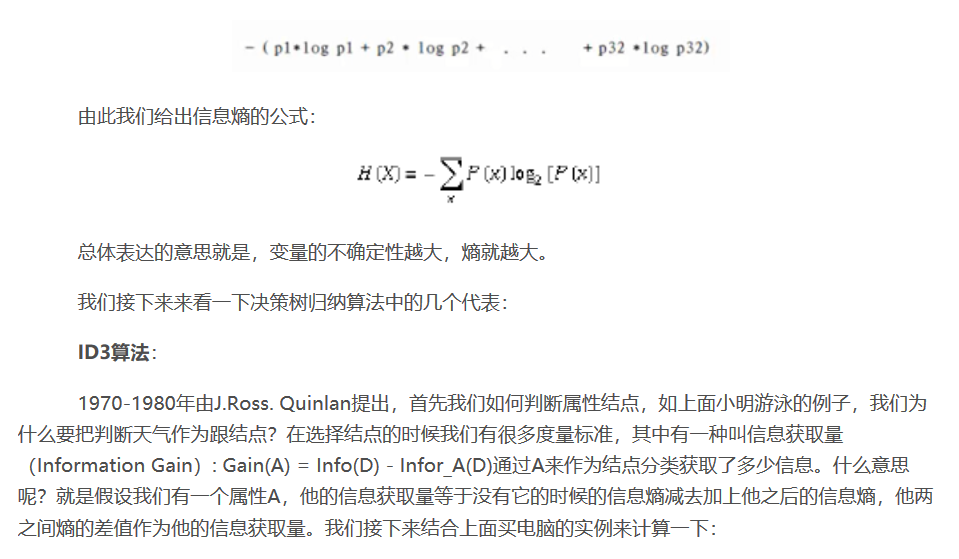

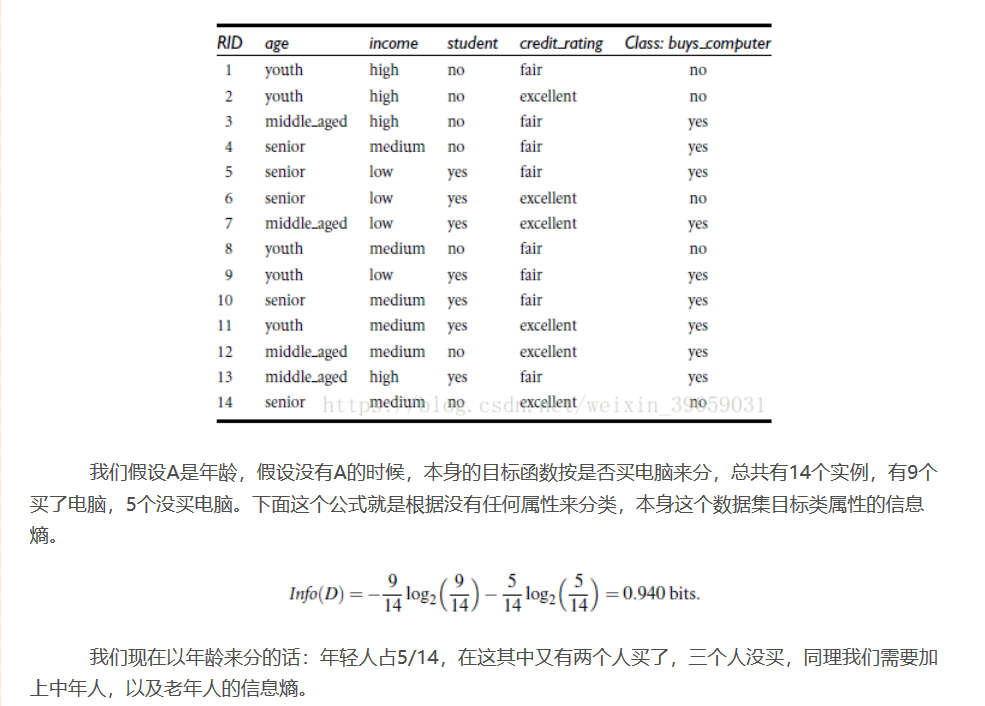

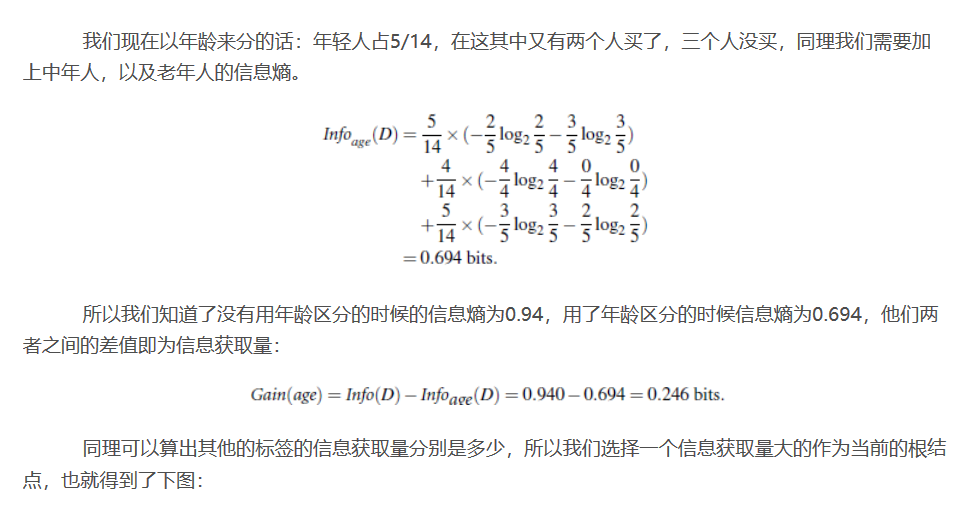

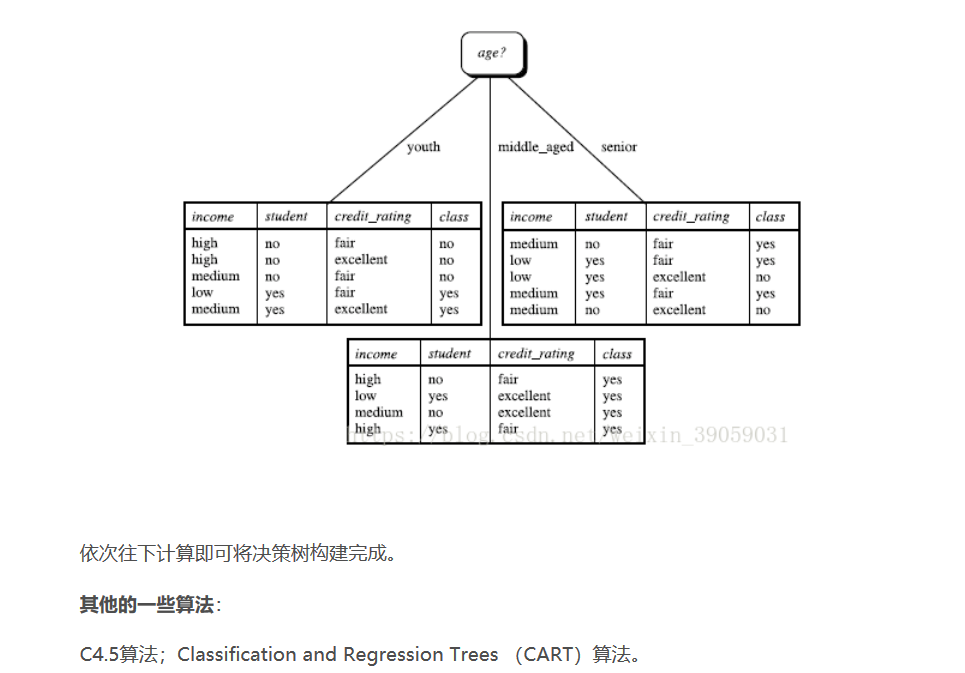

共同点：都是贪心算法，自上而下（Top-down approach）。

区别：属性选择度量方法不同：C4.5（gain ratio）， CART(gain index)。

In [3]:
from sklearn.datasets import load_iris
from sklearn import tree
#import graphviz
iris=load_iris()
clf=tree.DecisionTreeClassifier()
clf=clf.fit(iris.data,iris.target)
dot_data=tree.export_graphviz(clf,out_file=None)
#graph=graphviz.Source(dot_data)
#graph.render("iris")


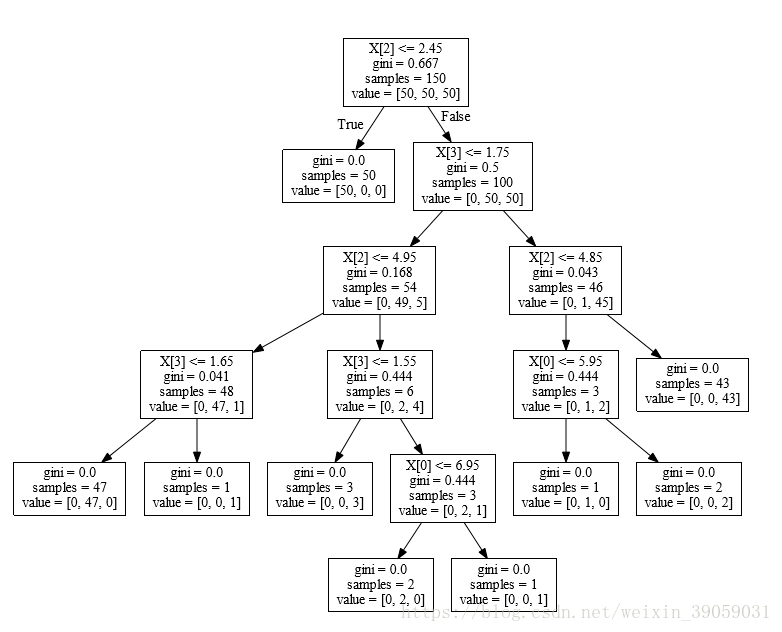


决策树
算法优缺点：

    优点：计算复杂度不高，输出结果易于理解，对中间值缺失不敏感，可以处理不相关的特征数据
    缺点：可能会产生过度匹配的问题
    适用数据类型：数值型和标称型

算法思想：
1.决策树构造的整体思想：

    决策树说白了就好像是if-else结构一样，它的结果就是你要生成这个一个可以从根开始不断判断选择到叶子节点的树，但是呢这里的if-else必然不会是让我们认为去设置的，我们要做的是提供一种方法，计算机可以根据这种方法得到我们所需要的决策树。这个方法的重点就在于如何从这么多的特征中选择出有价值的，并且按照最好的顺序由根到叶选择。完成了这个我们也就可以递归构造一个决策树了

2.信息增益

    划分数据集的最大原则是将无序的数据变得更加有序。既然这又牵涉到信息的有序无序问题，自然要想到想弄的信息熵了。这里我们计算用的也是信息熵（另一种方法是基尼不纯度）。公式如下：

数据需要满足的要求：

    1 数据必须是由列表元素组成的列表，而且所有的列白哦元素都要具有相同的数据长度
    2 数据的最后一列或者每个实例的最后一个元素应是当前实例的类别标签

函数：

    calcShannonEnt(dataSet)
    计算数据集的香农熵，分两步，第一步计算频率，第二部根据公式计算香农熵
    splitDataSet(dataSet, aixs, value)
    划分数据集，将满足X[aixs]==value的值都划分到一起，返回一个划分好的集合（不包括用来划分的aixs属性，因为不需要）
    chooseBestFeature(dataSet)
    选择最好的属性进行划分，思路很简单就是对每个属性都划分下，看哪个好。这里使用到了一个set来选取列表中唯一的元素，这是一中很快的方法
    majorityCnt(classList)
    因为我们递归构建决策树是根据属性的消耗进行计算的，所以可能会存在最后属性用完了，但是分类还是没有算完，这时候就会采用多数表决的方式计算节点分类
    createTree(dataSet, labels)
    基于递归构建决策树。这里的label更多是对于分类特征的名字，为了更好看和后面的理解。



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter
import math
from math import log
import pprint

In [5]:
# 书上题目5.1
def create_data():
    datasets = [['青年', '否', '否', '一般', '否'],
               ['青年', '否', '否', '好', '否'],
               ['青年', '是', '否', '好', '是'],
               ['青年', '是', '是', '一般', '是'],
               ['青年', '否', '否', '一般', '否'],
               ['中年', '否', '否', '一般', '否'],
               ['中年', '否', '否', '好', '否'],
               ['中年', '是', '是', '好', '是'],
               ['中年', '否', '是', '非常好', '是'],
               ['中年', '否', '是', '非常好', '是'],
               ['老年', '否', '是', '非常好', '是'],
               ['老年', '否', '是', '好', '是'],
               ['老年', '是', '否', '好', '是'],
               ['老年', '是', '否', '非常好', '是'],
               ['老年', '否', '否', '一般', '否'],
               ]
    labels = [u'年龄', u'有工作', u'有自己的房子', u'信贷情况', u'类别']
    # 返回数据集和每个维度的名称
    return datasets, labels

In [6]:
datasets,labels=create_data()

In [7]:
datasets

[['青年', '否', '否', '一般', '否'],
 ['青年', '否', '否', '好', '否'],
 ['青年', '是', '否', '好', '是'],
 ['青年', '是', '是', '一般', '是'],
 ['青年', '否', '否', '一般', '否'],
 ['中年', '否', '否', '一般', '否'],
 ['中年', '否', '否', '好', '否'],
 ['中年', '是', '是', '好', '是'],
 ['中年', '否', '是', '非常好', '是'],
 ['中年', '否', '是', '非常好', '是'],
 ['老年', '否', '是', '非常好', '是'],
 ['老年', '否', '是', '好', '是'],
 ['老年', '是', '否', '好', '是'],
 ['老年', '是', '否', '非常好', '是'],
 ['老年', '否', '否', '一般', '否']]

In [8]:
labels

['年龄', '有工作', '有自己的房子', '信贷情况', '类别']

In [9]:
train_data=pd.DataFrame(datasets,columns=labels)

In [10]:
train_data

,年龄,有工作,有自己的房子,信贷情况,类别
0,青年,否,否,一般,否
1,青年,否,否,好,否
2,青年,是,否,好,是
3,青年,是,是,一般,是
4,青年,否,否,一般,否
5,中年,否,否,一般,否
6,中年,否,否,好,否
7,中年,是,是,好,是
8,中年,否,是,非常好,是
9,中年,否,是,非常好,是


In [11]:
#熵
def calc_ent(datasets):
    data_length=len(datasets)
    label_count={}
    for i in range(data_length):
        label=datasets[i][-1]
        if label not in label_count:
            label_count[label]=0
        label_count[label]+=1
    ent=-sum([(p/data_length)*log(p/data_length,2)
             for p in label_count.values()])
    return ent


In [12]:
#经验条件熵
def cond_ent(datasets,axis=0):
    data_length=len(datasets)
    feature_sets={}
    for i in range(data_length):
        feature=datasets[i][axis]
        if feature not in feature_sets:
            feature_sets[feature]=[]
        feature_sets[feature].append(datasets[i])
    cond_ent=sum(
        [
            (len(p)/data_length)*calc_ent(p) for p in feature_sets.values()
        ]
    )
    return cond_ent


In [13]:
#信息增益
def info_gain(ent,cond_ent):
    return ent-cond_ent

def info_gain_train(datasets):
    count=len(datasets[0])-1
    ent=calc_ent(datasets)
    best_feature=[]
    for c in range(count):
        c_info_gain=info_gain(ent,cond_ent(datasets,axis=c))
        best_feature.append((c,c_info_gain))
        print('特征（{}）-info_gain-{:.3f}'.format(labels[c],c_info_gain))
        #比较大小
        best_=max(best_feature,key=lambda x:x[-1])
        return '特征（{}）的信息增益最大，选择为根节点特征'.format(labels[best_[0]])
    

In [14]:
info_gain_train(np.array(datasets))

特征（年龄）-info_gain-0.083


'特征（年龄）的信息增益最大，选择为根节点特征'

In [15]:
#利用ID3算法生成决策树

In [16]:
# 定义节点类 二叉树
class Node:
    def __init__(self, root=True, label=None, feature_name=None, feature=None):
        self.root = root
        self.label = label
        self.feature_name = feature_name
        self.feature = feature
        self.tree = {}
        self.result = {
            'label:': self.label,
            'feature': self.feature,
            'tree': self.tree
        }

    def __repr__(self):
        return '{}'.format(self.result)

    def add_node(self, val, node):
        self.tree[val] = node

    def predict(self, features):
        if self.root is True:
            return self.label
        return self.tree[features[self.feature]].predict(features)


class DTree:
    def __init__(self, epsilon=0.1):
        self.epsilon = epsilon
        self._tree = {}

    # 熵
    @staticmethod
    def calc_ent(datasets):
        data_length = len(datasets)
        label_count = {}
        for i in range(data_length):
            label = datasets[i][-1]
            if label not in label_count:
                label_count[label] = 0
            label_count[label] += 1
        ent = -sum([(p / data_length) * log(p / data_length, 2)
                    for p in label_count.values()])
        return ent

    # 经验条件熵
    def cond_ent(self, datasets, axis=0):
        data_length = len(datasets)
        feature_sets = {}
        for i in range(data_length):
            feature = datasets[i][axis]
            if feature not in feature_sets:
                feature_sets[feature] = []
            feature_sets[feature].append(datasets[i])
        cond_ent = sum([(len(p) / data_length) * self.calc_ent(p)
                        for p in feature_sets.values()])
        return cond_ent

    # 信息增益
    @staticmethod
    def info_gain(ent, cond_ent):
        return ent - cond_ent

    def info_gain_train(self, datasets):
        count = len(datasets[0]) - 1
        ent = self.calc_ent(datasets)
        best_feature = []
        for c in range(count):
            c_info_gain = self.info_gain(ent, self.cond_ent(datasets, axis=c))
            best_feature.append((c, c_info_gain))
        # 比较大小
        best_ = max(best_feature, key=lambda x: x[-1])
        return best_

    def train(self, train_data):
        """
        input:数据集D(DataFrame格式)，特征集A，阈值eta
        output:决策树T
        """
        _, y_train, features = train_data.iloc[:, :
                                               -1], train_data.iloc[:,
                                                                    -1], train_data.columns[:
                                                                                            -1]
        # 1,若D中实例属于同一类Ck，则T为单节点树，并将类Ck作为结点的类标记，返回T
        if len(y_train.value_counts()) == 1:
            return Node(root=True, label=y_train.iloc[0])

        # 2, 若A为空，则T为单节点树，将D中实例树最大的类Ck作为该节点的类标记，返回T
        if len(features) == 0:
            return Node(
                root=True,
                label=y_train.value_counts().sort_values(
                    ascending=False).index[0])

        # 3,计算最大信息增益 同5.1,Ag为信息增益最大的特征
        max_feature, max_info_gain = self.info_gain_train(np.array(train_data))
        max_feature_name = features[max_feature]

        # 4,Ag的信息增益小于阈值eta,则置T为单节点树，并将D中是实例数最大的类Ck作为该节点的类标记，返回T
        if max_info_gain < self.epsilon:
            return Node(
                root=True,
                label=y_train.value_counts().sort_values(
                    ascending=False).index[0])

        # 5,构建Ag子集
        node_tree = Node(
            root=False, feature_name=max_feature_name, feature=max_feature)

        feature_list = train_data[max_feature_name].value_counts().index
        for f in feature_list:
            sub_train_df = train_data.loc[train_data[max_feature_name] ==
                                          f].drop([max_feature_name], axis=1)

            # 6, 递归生成树
            sub_tree = self.train(sub_train_df)
            node_tree.add_node(f, sub_tree)

        # pprint.pprint(node_tree.tree)
        return node_tree

    def fit(self, train_data):
        self._tree = self.train(train_data)
        return self._tree

    def predict(self, X_test):
        return self._tree.predict(X_test)

In [17]:
datasets, labels = create_data()
data_df = pd.DataFrame(datasets, columns=labels)
dt = DTree()
tree = dt.fit(data_df)

In [18]:
tree

{'label:': None, 'feature': 2, 'tree': {'否': {'label:': None, 'feature': 1, 'tree': {'否': {'label:': '否', 'feature': None, 'tree': {}}, '是': {'label:': '是', 'feature': None, 'tree': {}}}}, '是': {'label:': '是', 'feature': None, 'tree': {}}}}

In [19]:
dt.predict(['老年','否','否','一般'])

'否'

# scikit-learn实例